<a href="https://colab.research.google.com/github/slawekpl81/data_science_udemy/blob/master/case_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
def fetch_financial_data(company='AMZN'): # Amazon
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.describe().T

In [13]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-02,3153.63,3195.7965,3123.0000,3125.00,5613098
2020-10-01,3208.00,3224.0000,3172.0000,3221.26,4971922
2020-09-30,3141.14,3212.8800,3133.9900,3148.73,4896101
2020-09-29,3175.39,3188.2600,3132.5400,3144.88,3503398
2020-09-28,3148.85,3175.0400,3117.1684,3174.05,4224165


In [ ]:
df.loc[:,'Volume']

In [17]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df10 = df.head(10)
df10

In [22]:
df10[['open', 'close']].T

Date,2020-10-02,2020-10-01,2020-09-30,2020-09-29,2020-09-28,2020-09-25,2020-09-24,2020-09-23,2020-09-22,2020-09-21
open,3153.63,3208.00,3141.14,3175.39,3148.85,3054.86,2977.79,3120.43,3033.835,2906.50
close,3125.00,3221.26,3148.73,3144.88,3174.05,3095.13,3019.79,2999.86,3128.990,2960.47


In [ ]:
df10.iloc[:,[0,-2]]

In [ ]:
df10.iloc[:,3:5]

In [ ]:
df10.iloc[[1,3],[0,-2]]

In [ ]:
df.loc['2019-12-10': '2019-12-01']

In [ ]:
df = fetch_financial_data('MSFT') # microsotf
df.describe()

In [34]:
df = fetch_financial_data('UBER') # uber
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 354 entries, 2020-10-02 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    354 non-null    float64
 1   High    354 non-null    float64
 2   Low     354 non-null    float64
 3   Close   354 non-null    float64
 4   Volume  354 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.6 KB


In [ ]:
# nowa kolumna
df['Average'] = (df.Open + df.Close)/2
df

In [37]:
df = df.sort_index()

In [ ]:
df['Close_shift'] = df.Close.shift(1) # shift() przesunięcie kolumny w pione
df

In [ ]:
# dzienna zmiana w procentach
df['Daily_Change'] = (df.Close / df.Close_shift -1) * 100
# del df['Daily Change']
df

In [55]:
df.Daily_Change.max()

38.25910931174088

In [56]:
df.Daily_Change.idxmax()

Timestamp('2020-03-19 00:00:00')

In [60]:
df.loc[[df.Daily_Change.idxmax(), df.Daily_Change.idxmin()]]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-03-19,15.96,21.26,15.70,20.49,83988721,18.225,14.82,38.259109
2020-03-18,17.76,17.80,13.71,14.82,78286212,16.290,18.91,-21.628768


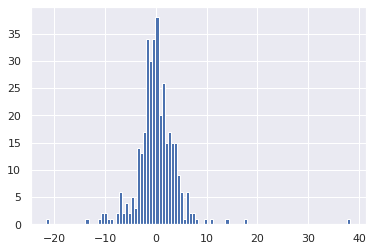

In [53]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

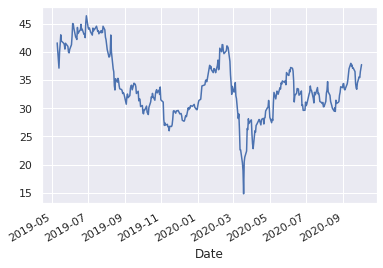

In [54]:
df.Close.plot()